In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z (Codes and Datasets)/Part 11 - RNN/MSFT.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-04-01,0.095486,0.095486,0.094618,0.094618,0.059844,11088000
1,1986-04-02,0.094618,0.097222,0.094618,0.095486,0.060393,27014400
2,1986-04-03,0.096354,0.098958,0.096354,0.096354,0.060942,23040000
3,1986-04-04,0.096354,0.097222,0.096354,0.096354,0.060942,26582400
4,1986-04-07,0.096354,0.097222,0.092882,0.094618,0.059844,16560000
...,...,...,...,...,...,...,...
8927,2021-08-30,301.119995,304.220001,301.059998,303.589996,303.589996,16348100
8928,2021-08-31,304.420013,304.500000,301.500000,301.880005,301.880005,26285300
8929,2021-09-01,302.869995,305.190002,301.489990,301.829987,301.829987,18983800
8930,2021-09-02,302.200012,303.359985,300.179993,301.149994,301.149994,16285600


In [4]:
training_set = df.iloc[:8907, 1:2].values

test_set = df.iloc[8907:, 1:2].values

print('The shape of the training_set is: {}'.format(training_set.shape))
print('The shape of the test_set is: {}'.format(test_set.shape))

The shape of the training_set is: (8907, 1)
The shape of the test_set is: (25, 1)


In [5]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))

training_set_scaled = sc.fit_transform(training_set)

In [6]:
#creating a data structure with 60 timesteps 
X_train = []
y_train = []

time_steps = 60

for i in range(time_steps, 8907):
    X_train.append(training_set_scaled[i-time_steps:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('The shape of X_train is: {}'.format(X_train.shape))
print('The shape of y_train is: {}'.format(y_train.shape))

X_train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))

print('The shape of X_train after reshaping is: {}'.format(X_train.shape))

The shape of X_train is: (8847, 60)
The shape of y_train is: (8847,)
The shape of X_train after reshaping is: (8847, 60, 1)


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
regrossor = Sequential()

regrossor.add(LSTM(units= 80, return_sequences= True, input_shape = (X_train.shape[1],1)))
regrossor.add(Dropout(rate=0.2))

regrossor.add(LSTM(units=80, return_sequences=True))
regrossor.add(Dropout(rate=0.2))

regrossor.add(LSTM(units=80, return_sequences=True))
regrossor.add(Dropout(rate=0.2))

regrossor.add(LSTM(units=80, return_sequences=True))
regrossor.add(Dropout(rate=0.2))

regrossor.add(LSTM(units=80, return_sequences=False))
regrossor.add(Dropout(rate=0.2))

regrossor.add(Dense(units=1))

regrossor.compile(optimizer='adam', loss='mean_squared_error')

regrossor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
277/277 [==============================] - 68s 215ms/step - loss: 0.0013
Epoch 2/200
277/277 [==============================] - 60s 218ms/step - loss: 6.6292e-04
Epoch 3/200
277/277 [==============================] - 60s 217ms/step - loss: 6.1959e-04
Epoch 4/200
277/277 [==============================] - 59s 215ms/step - loss: 5.0145e-04
Epoch 5/200
277/277 [==============================] - 59s 214ms/step - loss: 5.7168e-04
Epoch 6/200
277/277 [==============================] - 60s 215ms/step - loss: 4.5582e-04
Epoch 7/200
277/277 [==============================] - 60s 215ms/step - loss: 3.7037e-04
Epoch 8/200
277/277 [==============================] - 59s 215ms/step - loss: 3.7011e-04
Epoch 9/200
277/277 [==============================] - 59s 215ms/step - loss: 4.3837e-04
Epoch 10/200
277/277 [==============================] - 60s 218ms/step - loss: 3.2901e-04
Epoch 11/200
277/277 [==============================] - 60s 217ms/step - loss: 3.0401e-04
Epoch 12/200
277/277 [=

In [9]:
inputs = df.iloc[len(df)-len(test_set)-time_steps:, 1:2].values
print('The shape of inputs is: {}'.format(inputs.shape))
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []

for i in range(time_steps, time_steps+len(test_set)):
    X_test.append(inputs[i-time_steps:i, 0])

print('The length of X_test list is: {}'.format(len(X_test)))

X_test = np.array(X_test)
print('The shape of X_test array is : {}'.format(X_test.shape))

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regrossor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

The shape of inputs is: (85, 1)
The length of X_test list is: 25
The shape of X_test array is : (25, 60)


In [10]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))

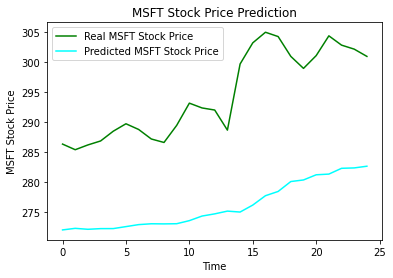

In [11]:
plt.plot(test_set, color = 'green', label = 'Real MSFT Stock Price')
plt.plot(predicted_stock_price, color = 'cyan', label = 'Predicted MSFT Stock Price')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MSFT Stock Price')
plt.legend()
plt.show()